# Lab Activity Week 6

**Homework** Anything you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

### Step 1 - Review: Comparing Indoor vs Outdoor data
- Cut out any data that was part of your outdoor data set that was not taken outdoors or take a new outdoor data set that runs for an extra 30s to give you time to get outside and then cut out that 30s interval
  - Recall we learned methods for slicing dataframes in week 2
- Now produce histogram plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

### Step 2: Comparing sensors
- Get inside/outside data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 1. - Do the same statistical comparison of your outside data with the outside data from the other group.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

### Step 3: More locations
- Consider other areas you could take your sensors where you might find a larger change in the data: for example, is there somewhere near lab where the air quality might be significantly worse?
- Set up your system to be able to run in a way that would allow you to get to that location and take ~5 minutes of data.
  - This might require adding additional input arguments, like a delayed start time, or changing to running indefinitely but making sure that your data is being collected and saved even if your script does not run gracefully.
- Compare this new set of data with your other outdoor data, including the same set of graphs and statistical comparisons made for earlier steps.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

outsideurl = "https://raw.githubusercontent.com/rgorai22/E11_RishikaKatieVic/main/FiveMinOutside.csv" 
outsidedf = pd.read_csv(outsideurl)

insideurl = "https://raw.githubusercontent.com/rgorai22/E11_RishikaKatieVic/main/FiveMinutesInside.csv"
insidedf = pd.read_csv(insideurl)

outsidebadurl = "https://raw.githubusercontent.com/rgorai22/E11_RishikaKatieVic/main/bad_outside.csv"
outsidebad = pd.read_csv(outsidebadurl).drop(50)
display(outsidedf)
outsidedf.describe()
display(insidedf)
insidedf.describe()
display(outsidebad)
outsidebad.describe()

,Time,Pm25,Pm100,Temp,Gas,Humidity,Pressure,Altitude
0,1.707957e+09,0,0,33.557930,236730,100.000000,727.240030,2711.431262
1,1.707957e+09,0,0,24.594453,22689,42.328480,1005.271764,66.637026
2,1.707957e+09,1,1,24.623359,29622,42.236508,1005.244340,66.866814
3,1.707957e+09,1,1,24.657734,37252,42.109519,1005.229004,66.995326
4,1.707957e+09,1,1,24.692891,45424,41.964882,1005.213153,67.128143
...,...,...,...,...,...,...,...,...
291,1.707958e+09,1,2,13.799531,261172,67.314556,1004.419332,73.782132
292,1.707958e+09,1,2,13.799727,263155,67.368367,1004.423061,73.750859
293,1.707958e+09,1,2,13.801094,263957,67.395461,1004.420117,73.775550
294,1.707958e+09,1,2,13.801484,262557,67.469501,1004.419031,73.784652


,Time,Pm25,Pm100,Temp,Gas,Humidity,Pressure,Altitude
0,1.707957e+09,1,1,33.557930,120225,100.000000,727.240030,2711.431262
1,1.707957e+09,1,1,23.825703,17430,43.860892,1005.108567,68.004563
2,1.707957e+09,1,1,23.856562,21727,43.780439,1005.113853,67.960268
3,1.707957e+09,0,0,23.890937,28715,43.640478,1005.112530,67.971354
4,1.707957e+09,0,0,23.921992,34977,43.494255,1005.114644,67.953638
...,...,...,...,...,...,...,...,...
292,1.707957e+09,0,0,24.569844,207155,41.287415,1005.168694,67.500700
293,1.707957e+09,0,0,24.569648,207527,41.281479,1005.173598,67.459600
294,1.707957e+09,0,0,24.570234,207651,41.275629,1005.174522,67.451863
295,1.707957e+09,0,0,24.569844,208400,41.263758,1005.172169,67.471581


,Time,Pm25,Pm100,Temp,Gas,Humidity,Pressure,Altitude
0,1.707960e+09,0,0,33.914766,361244,100.000000,698.528280,3029.237108
1,1.707960e+09,0,0,26.064375,93938,38.350451,1011.213435,16.969610
2,1.707960e+09,0,0,26.087422,113179,38.256627,1011.235290,16.787357
3,1.707960e+09,0,0,26.115547,130510,38.145353,1011.240730,16.741993
4,1.707960e+09,0,0,26.149531,143985,38.130872,1011.250465,16.660816
...,...,...,...,...,...,...,...,...
280,1.707960e+09,1,1,21.642500,441891,41.812875,1009.881079,28.086404
281,1.707960e+09,1,1,21.608320,443052,41.980254,1009.879251,28.101664
282,1.707960e+09,1,1,21.577852,443635,42.093130,1009.883521,28.066017
283,1.707960e+09,0,1,21.585078,443344,42.222430,1009.883127,28.069305


,Time,Pm25,Pm100,Temp,Gas,Humidity,Pressure,Altitude
count,2.840000e+02,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,1.707960e+09,0.517606,1.267606,21.571141,368639.084507,44.762929,1009.058529,36.369254
std,9.854289e+01,0.579118,0.927899,2.508895,80153.553743,5.110330,18.496420,178.255727
min,1.707960e+09,0.000000,0.000000,19.071406,93938.000000,37.183527,698.528280,16.631340
25%,1.707960e+09,0.000000,1.000000,19.303096,346893.250000,41.330182,1009.888420,25.652413
50%,1.707960e+09,0.000000,1.000000,20.936836,403788.000000,45.752924,1009.993474,27.148152
75%,1.707960e+09,1.000000,2.000000,22.926875,422047.000000,47.852043,1010.172673,28.025117
max,1.707960e+09,2.000000,3.000000,33.914766,445099.000000,100.000000,1011.253999,3029.237108


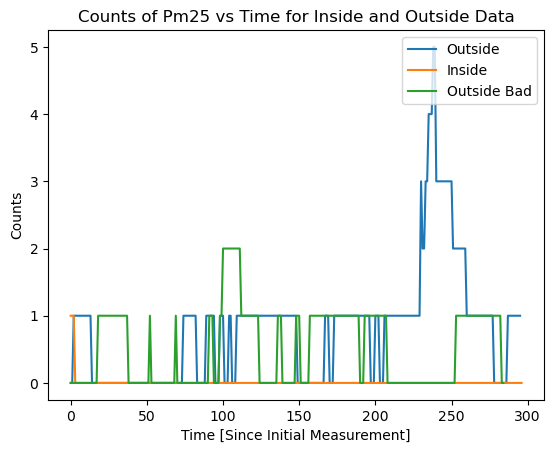

In [3]:
plt.plot(outsidedf["Pm25"],label='Outside')
plt.plot(insidedf["Pm25"],label='Inside')
plt.plot(outsidebad["Pm25"],label='Outside Bad')
plt.legend(loc='upper right')
plt.ylabel('Counts')                       
plt.xlabel('Time [Since Initial Measurement]')
plt.title("Counts of Pm25 vs Time for Inside and Outside Data")                                  
plt.show()

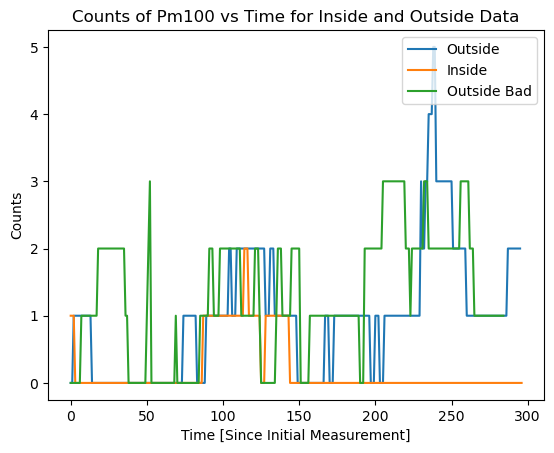

In [4]:
plt.plot(outsidedf["Pm100"],label='Outside')
plt.plot(insidedf["Pm100"],label='Inside')
plt.plot(outsidebad["Pm100"],label='Outside Bad')
plt.legend(loc='upper right')
plt.ylabel('Counts')                       
plt.xlabel('Time [Since Initial Measurement]')
plt.title("Counts of Pm100 vs Time for Inside and Outside Data")                                  
plt.show()

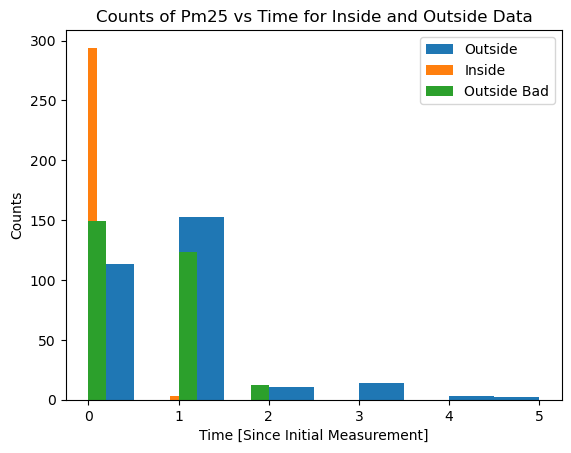

In [5]:
plt.hist(outsidedf["Pm25"],label='Outside')
plt.hist(insidedf["Pm25"],label='Inside')
plt.hist(outsidebad["Pm25"],label='Outside Bad')
plt.legend(loc='upper right')
plt.ylabel('Counts')                       
plt.xlabel('Time [Since Initial Measurement]')
plt.title("Counts of Pm25 vs Time for Inside and Outside Data")                                  
plt.show()

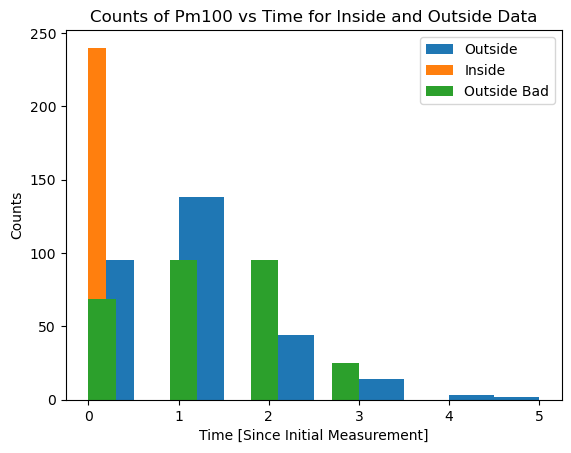

In [6]:
plt.hist(outsidedf["Pm100"],label='Outside')
plt.hist(insidedf["Pm100"],label='Inside')
plt.hist(outsidebad["Pm100"],label='Outside Bad')
plt.legend(loc='upper right')
plt.ylabel('Counts')                       
plt.xlabel('Time [Since Initial Measurement]')
plt.title("Counts of Pm100 vs Time for Inside and Outside Data")                                  
plt.show()

In [7]:
sigmambad25 = (np.std(outsidebad["Pm25"]))/np.sqrt(len(outsidebad["Pm25"]))
meanbad25 = np.mean(outsidebad["Pm25"])
sigmamout25 = (np.std(outsidedf["Pm25"]))/np.sqrt(len(outsidedf["Pm25"]))
sigmam25 = (np.std(outsidebad["Pm25"])+np.std(outsidedf["Pm25"]))/np.sqrt(len(outsidedf["Pm25"])+len(outsidebad["Pm25"]))
meanout25 = np.mean(outsidedf["Pm25"])
meandiff25 = abs(meanbad25-meanout25)
sigmam253 = 3*abs(sigmam25)

if sigmam253 < meandiff25:
    print("Pm25 data sets are statistically different!")
else:
    print("Pm25 data sets are statistically similar, means within 3sigma of uncertainty of the mean.")

display("Pm25 mean uncertainty: ",sigmam25)
sigdiffbad25 = meandiff25 / sigmambad25
print("\033[1m For Pm25 the outside bad and outside measurements are separated by {:.2f} outside mean standard deviations. \033[0m".format(sigdiffbad25))
    
sigmam100 = (np.std(outsidebad["Pm100"])+np.std(outsidedf["Pm100"]))/np.sqrt(len(outsidedf["Pm100"])+len(outsidebad["Pm100"]))
sigmambad100 = (np.std(outsidebad["Pm100"]))/np.sqrt(len(outsidebad["Pm100"]))
meanbad100 = np.mean(outsidebad["Pm100"])
sigmamout100 = (np.std(outsidedf["Pm100"]))/np.sqrt(len(outsidedf["Pm100"]))
meanout100 = np.mean(outsidedf["Pm100"])
meandiff100 = abs(meanbad100-meanout100)
sigmam1003 = 3*abs(sigmam100)

if sigmam1003 < meandiff100:
    print("Pm100 data sets are statistically different!")
else:
    print("Pm100 data sets are statistically similar, means within 3sigma of uncertainty of the mean.")
    
display("Pm100 mean uncertainty: ",sigmam100)
sigdiffbad100 = meandiff100 / sigmambad100
print("\033[1m For Pm100 the outside bad and outside measurements are separated by {:.2f} outside mean standard deviations. \033[0m".format(sigdiffbad100))

Pm25 data sets are statistically different!


'Pm25 mean uncertainty: '

0.0604485455131877

 For Pm25 the outside bad and outside measurements are separated by 8.45 outside mean standard deviations. 
Pm100 data sets are statistically different!


'Pm100 mean uncertainty: '

0.07691602907633557

 For Pm100 the outside bad and outside measurements are separated by 5.24 outside mean standard deviations. 


### Step 4: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How would you quantify this?
  - HINT: there are linear correlation comparisons you can make mathematically such as the Pearson's correlation or similar (linear $R^2$), is the correlation you are seeing linear? Can you implement these in code?
- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.
  - This will require coming up with a way to ensure that the times match between sensors, what about the way you are collecting data ensures that this is true?
 

Text(0.5, 1.0, 'Temperature vs Humidity')

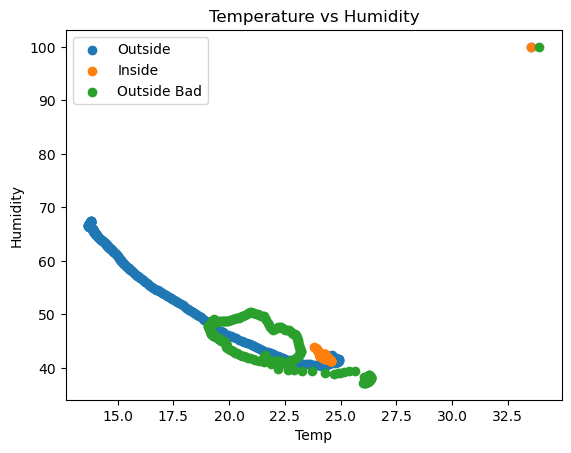

In [8]:
plt.scatter(x=outsidedf["Temp"], y=outsidedf["Humidity"], label="Outside")
plt.scatter(x=insidedf["Temp"], y=insidedf["Humidity"], label="Inside")
plt.scatter(x=outsidebad["Temp"], y=outsidebad["Humidity"], label="Outside Bad")
plt.legend() 
plt.xlabel("Temp")
plt.ylabel("Humidity")
plt.title("Temperature vs Humidity")

In [52]:
#calculates pearson correlation (r) between temperature and humidity
out_temphum = outsidedf.corr('pearson').loc["Temp","Humidity"]
in_temphum = insidedf.corr('pearson').loc["Temp","Humidity"]
bad_temphum = outsidebad.corr('pearson').loc["Temp","Humidity"]
print("The outside Pearson correlation between Temperature and Humidity is:", out_temphum)
print("Inside Pearson correlation is:",in_temphum)
print("Outside bad Pearson correlation is:", bad_temphum)

The outside Pearson correlation between Temperature and Humidity is: -0.8603248666247312
Inside Pearson correlation is: 0.9354110410943756
Outside bad Pearson correlation is: -0.4027593703166163


It appears there is some sort of _correlation_ between temperature and humidity for the outside data. The data points seem to linearly decrease, meaning as humidity decreases, temperature increases. However, inside barely changed while outside (when measuring bad air quality) seems to fluxuate even at similar temperatures. The hidden variable could possibly be that temperature and humidity are not directly correlated, but are both affected by a third, unknown variable that is unaccounted for.

Additionally, when observing the correlation values, we can infer that the outside and inside temperature is correlated to humidity, as the value is close to 1.0 or -1.0, while the final outside bad is not as strongly correlated (with a value of 0.4).

Text(0.5, 1.0, 'Temperature vs Pressure')

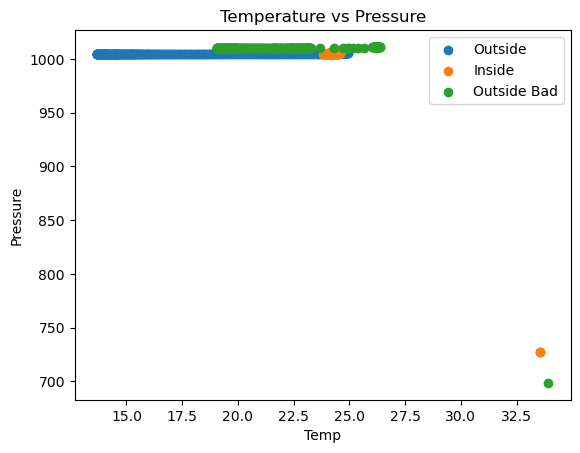

In [16]:
plt.scatter(x=outsidedf["Temp"], y=outsidedf["Pressure"], label="Outside")
plt.scatter(x=insidedf["Temp"], y=insidedf["Pressure"], label="Inside")
plt.scatter(x=outsidebad["Temp"], y=outsidebad["Pressure"], label="Outside Bad")
plt.legend() 
plt.xlabel("Temp")
plt.ylabel("Pressure")
plt.title("Temperature vs Pressure")

In [53]:
#calculates pearson correlation (r) between temperature and Pressure
out_temphum = outsidedf.corr('pearson').loc["Temp","Pressure"]
in_temphum = insidedf.corr('pearson').loc["Temp","Pressure"]
bad_temphum = outsidebad.corr('pearson').loc["Temp","Pressure"]
print("The outside Pearson correlation between Temperature and Pressure is:", out_temphum)
print("Inside Pearson correlation is:",in_temphum)
print("Outside bad Pearson correlation is:", bad_temphum)

The outside Pearson correlation between Temperature and Pressure is: -0.21816964259967495
Inside Pearson correlation is: -0.966223110117538
Outside bad Pearson correlation is: -0.2776545241853843


Using this data, we can conclude that outside temperature is not correlated with pressure whatsoever, as their pearson correlation values are near or close to 0 from 1. However, the inside temperature appears correlated to pressure, but we must take into account the other data points and infer this appearance of correlation can be from other variables affecting the readings, rather than a direct correlation between temperature and pressure inside.

Text(0.5, 1.0, 'Temperature vs Gas')

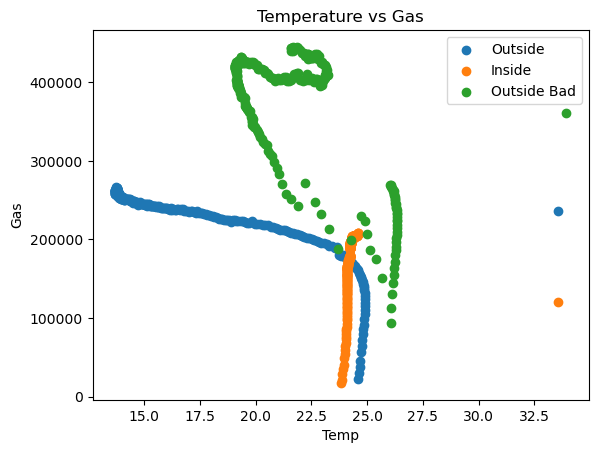

In [17]:
plt.scatter(x=outsidedf["Temp"], y=outsidedf["Gas"], label="Outside")
plt.scatter(x=insidedf["Temp"], y=insidedf["Gas"], label="Inside")
plt.scatter(x=outsidebad["Temp"], y=outsidebad["Gas"], label="Outside Bad")
plt.legend() 
plt.xlabel("Temp")
plt.ylabel("Gas")
plt.title("Temperature vs Gas")

In [56]:
#calculates pearson correlation (r) between temperature and gas
out_temphum = outsidedf.corr('pearson').loc["Temp","Gas"]
in_temphum = insidedf.corr('pearson').loc["Temp","Gas"]
bad_temphum = outsidebad.corr('pearson').loc["Temp","Gas"]
print("The outside Pearson correlation between Temperature and Gas is:", out_temphum)
print("Inside Pearson correlation is:",in_temphum)
print("Outside bad Pearson correlation is:", bad_temphum)

The outside Pearson correlation between Temperature and Gas is: -0.8586745682618746
Inside Pearson correlation is: 0.12602748312698722
Outside bad Pearson correlation is: -0.6704166980909309


Here, outside seems the closest to being correlated, but because of the varying amounts between all three types, the data shows that temperature and gas is not correlated (inside pearson correlation value close to 0, outside bad pearson correlation midway, and outside close to 1).

Text(0.5, 1.0, 'Temperature vs Altitude')

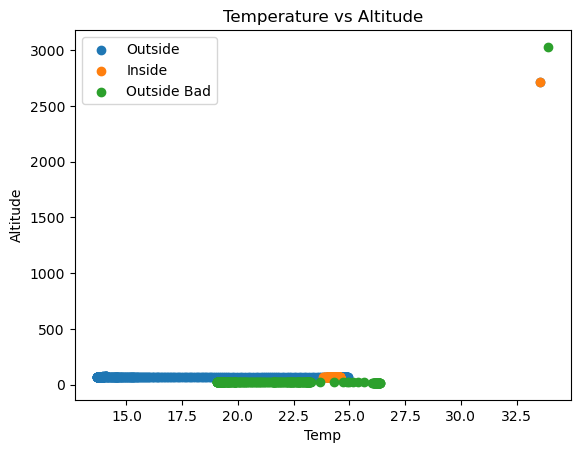

In [18]:
plt.scatter(x=outsidedf["Temp"], y=outsidedf["Altitude"], label="Outside")
plt.scatter(x=insidedf["Temp"], y=insidedf["Altitude"], label="Inside")
plt.scatter(x=outsidebad["Temp"], y=outsidebad["Altitude"], label="Outside Bad")
plt.legend() 
plt.xlabel("Temp")
plt.ylabel("Altitude")
plt.title("Temperature vs Altitude")

In [55]:
#calculates pearson correlation (r) between temperature and altitude
out_temphum = outsidedf.corr('pearson').loc["Temp","Altitude"]
in_temphum = insidedf.corr('pearson').loc["Temp","Altitude"]
bad_temphum = outsidebad.corr('pearson').loc["Temp","Altitude"]
print("The outside Pearson correlation between Temperature and Altitude is:", out_temphum)
print("Inside Pearson correlation is:",in_temphum)
print("Outside bad Pearson correlation is:", bad_temphum)

The outside Pearson correlation between Temperature and Altitude is: 0.21984020394120582
Inside Pearson correlation is: 0.9662427872002691
Outside bad Pearson correlation is: 0.2797205249084472


Again, using this data, we can conclude that outside temperature is not correlated with altitude, as their pearson correlation values are near or close to 0 from 1. However, the inside temperature appears correlated to altitude, but we must take into account the other data points and infer this appearance of correlation can be from other variables affecting the readings, rather than a direct correlation between temperature and altitude inside.

Text(0.5, 1.0, 'Temperature vs Pm25')

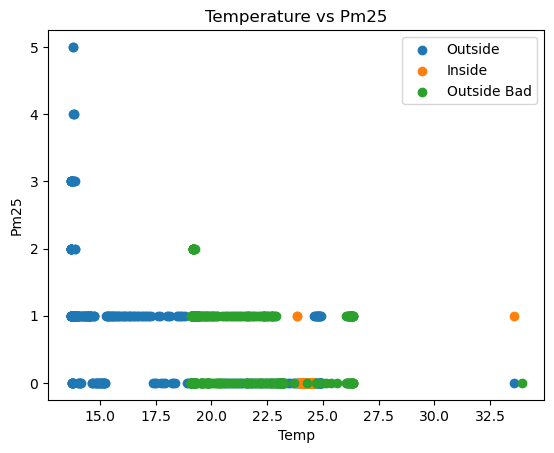

In [37]:
plt.scatter(x=outsidedf["Temp"], y=outsidedf["Pm25"], label="Outside")
plt.scatter(x=insidedf["Temp"], y=insidedf["Pm25"],label="Inside")
plt.scatter(x=outsidebad["Temp"], y=outsidebad["Pm25"], label="Outside Bad")
plt.legend() 
plt.xlabel("Temp")
plt.ylabel("Pm25")
plt.title("Temperature vs Pm25")